In [1961]:
#Libraries

import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time

#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n >= 0:
        return 1
    else:
        return 0


# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: 
## Matrícula: 

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [1962]:
def decimacao(sinal):
    sinal_decimado =[]
    for i in range(len(sinal)):
        if (i) % 2 == 0:
            sinal_decimado.append(sinal[i])
    return sinal_decimado

x = [1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0]
y = decimacao(x)
print(f'sinal: {x}')
print(f'sinal decimado: {y}')

sinal: [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
sinal decimado: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [1963]:
def interpolacao(sinal):
    sinal_interpolado = [(0.5*sinal[0]) , sinal[0]]
    for i in range(1, len(sinal)):
        sinal_interpolado.append((0.4*sinal[i-1]) + (0.6*sinal[i])) 
        sinal_interpolado.append(sinal[i]) 
    return sinal_interpolado

z = interpolacao(y)
print(f'sinal: {y}')
print(f'sinal interpolado: {z}')

# def interpolacao(sinal):
#     sinal_interpolado = [sinal[0]]
#     for i in range(1, len(sinal)):
#         sinal_interpolado.append(sinal[i]) 
#         sinal_interpolado.append(sinal[i]) 
#     return sinal_interpolado

# z = interpolacao(y)
# print(f'sinal: {y}')
# print(f'sinal interpolado: {z}')


sinal: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sinal interpolado: [0.5, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512


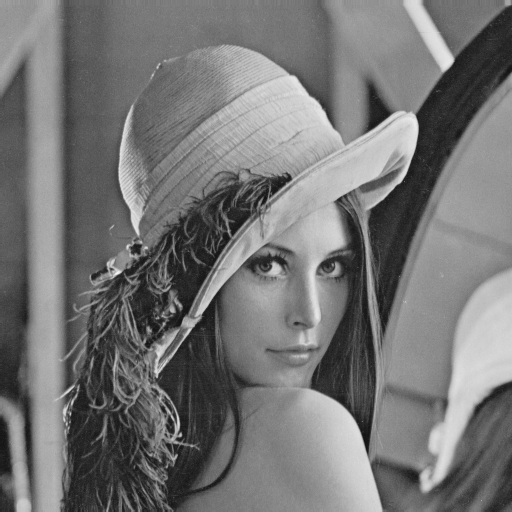

Imagem decimada de tamanho: 32 x 32


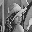

In [1964]:
def ate16(tamanho_original):
    return int(math.log2(tamanho_original) - math.log2(16))

im = Image.open("lena.bmp")
imagem = np.array(im)
h, w = imagem.shape
print(f'Imagem original de tamanho: {h} x {w}')
display(im)

for i in range(4):
    imagem = decimacao(imagem)
    imagem = np.transpose(imagem)
    imagem = decimacao(imagem)
    imagem = np.transpose(imagem)

imagem_decimada = Image.fromarray(imagem.astype('uint8'))
im_decimada = np.array(imagem)
hp, wp = im_decimada.shape

print(f'Imagem decimada de tamanho: {hp} x {wp}')
display(imagem_decimada)


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem original de tamanho: 512 x 512


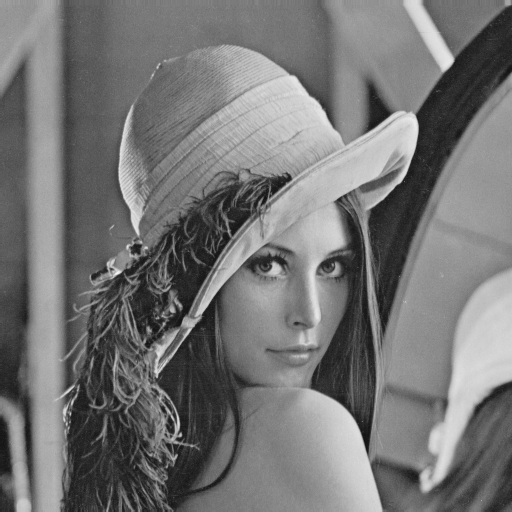

Imagem decimada de tamanho: 32 x 32


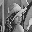

Imagem interpolada de tamanho: 512 x 512


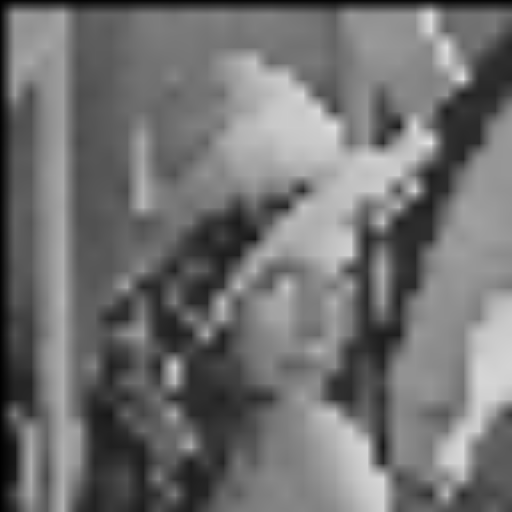

In [1965]:
def ate512(tamanho_original):
    return int(math.log2(512) - math.log2(tamanho_original))

print(f'Imagem original de tamanho: {h} x {w}')
display(im)
print(f'Imagem decimada de tamanho: {hp} x {wp}')
display(imagem_decimada)
for i in range(4):
    imagem = interpolacao(imagem)
    imagem = np.transpose(imagem)
    imagem = interpolacao(imagem)
    imagem = np.transpose(imagem)

imagem_interpolada = Image.fromarray(imagem.astype('uint8'))
im_interpolada = np.array(imagem)
hp, wp = im_interpolada.shape
print(f'Imagem interpolada de tamanho: {hp} x {wp}')
display(imagem_interpolada)

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [1966]:
# dado o sinal:
# y[n + 2] + (1/6)y[n] = x[n + 2] + 2x[n + 1] + x[n]
# =>
# (E^2 + 1/6)y[n] = (E^2 + 2E + 1)x[n] e h[n] = δ[n] + 2δ[n-1] + δ[n-2] - (1/6)h[n-2] 
# O polinômio característico é: (γ^2 + 1/6)
# Gerando as raízes complexas características +-j/sqrt(6) => +-j/sqrt(6)
# Calculando o módulo: sqrt(0^2 + 1/sqrt(6)^2) = 1/sqrt(6) => 1/sqrt(6)
# Calculando o ângulo: como a parte real é 0 será arctg(∞) = +-π/2
# =>
# y0(n) = c1(+/sqrt(6))^n  + c2(-j/sqrt(6))^n
#
# E para encontrar  os valores iniciais do sistema substituimos n:
# h[-2] = δ[-2] + 2δ[-3] + δ[-4] - (1/6)h[-4] = 0 + 0 + 0 + 0 = 0
# h[-1] = δ[-1] + 2δ[-2] + δ[-3] - (1/6)h[-3] = 0 + 0 + 0 + 0 = 0
# h[0] = δ[0] + 2δ[-1] + δ[-2] - (1/6)h[-2] = 1 + 0 + 0 + 0 = 1
# h[1] = δ[1] + 2δ[0] + δ[-1] - (1/6)h[-1] = 0 + 2 + 0 + 0 = 2
# h[2] = δ[2] + 2δ[1] + δ[0] - (1/6)h[0] = 0 + 0 + 1 - 1/6 = -5/6
#
# Como h[n] = A0δ[n] + y0[n]u[n], e A0 = bn/an = 1/(1/6)
# =>
# h[n] = 6δ[n] + [c1(+j/sqrt(6))^n  + c2(-j/sqrt(6))^n]]u[n]
# => 
# h[0] = 6δ[0] + [c1(+j/sqrt(6))^0  + c2(-j/sqrt(6))^0]]u[0] = 6 + c1 + c2 = 1                 => c1 + c2 = -5
# h[1] = 6δ[1] + [c1(+j/sqrt(6))^1  + c2(-j/sqrt(6))^1]]u[1] = 0 + (c1 - c2)(-j/sqrt(6)) = 2   => c1 - c2 = -2sqrt(6)/j = 2jsqrt(6)
# =>
#                                  / 2jsqrt(6) + 5 \ 
# -5 - 2c2 =  2jsqrt(6) => c2 =  -|-----------------|
#                                  \       2       / 
#                                 / 2jsqrt(6) - 5 \ 
#  5 + 2c1 =  2jsqrt(6) => c1 =  |-----------------|
#                                 \       2       / 
#
#
#
#                         Portanto h[n] = 6δ[n] + [-(2jsqrt(6)+5/2)(+j/sqrt(6))^n  + (2jsqrt(6)-5/2)(-j/sqrt(6))^n]]u[n]
# 
#



## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

Gráfico de h[n]


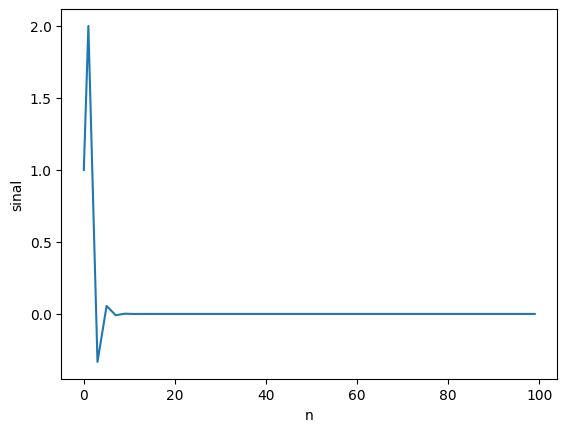

Gráfico de g[n]


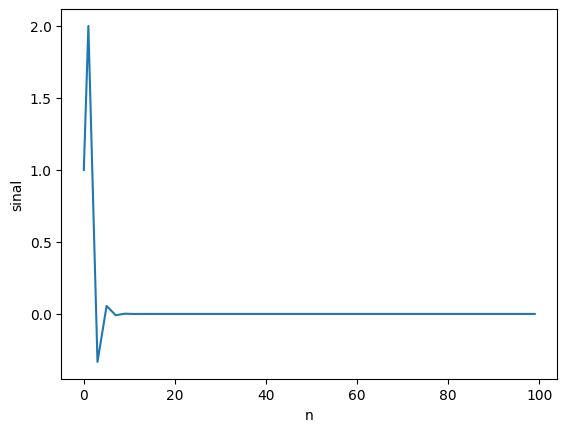

Erro médio quadradico: (7.069257870901531e-34+0j)


In [1967]:

def sinal(n):
    if n <= -1:
        return 0
    else:
        resultado = δ(n) + 2*δ(n-1) + δ(n-2) - (sinal(n-2)/6)
        return resultado

def sinalg(n):
    if n >= 0:
        c1 = (-((2j * np.sqrt(6) + 5) / 2) * (np.power(1j / np.sqrt(6), n)))
        c2 = ((2j * np.sqrt(6) - 5) / 2) * (np.power(-1j / np.sqrt(6), n))
        return (6*δ(n)) + c1 + c2
    else:
        return 0

def erro(sinal1, sinal2):
    MSE = 0
    for i in range(len(sinal1)):
        MSE += (sinal1[i] - sinal2[i])**2
    return MSE/len(sinal1)


hn = []
gn = []
tes = []
for i in range(100):
    hn.append(sinal(i))
    gn.append(sinalg(i))



print("Gráfico de h[n]")
plt.plot(hn)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print("Gráfico de g[n]")
plt.plot(gn)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()


print(f"Erro médio quadradico: {erro(hn,gn)}")




## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [1968]:
# Dado que a resposta ao sitema a estas condições pode ser determinada pela convolução do sinal (0.25)^n u[n] com a resposta ao impulso h[n]
# Podemos dividir h[n] em 3 somas => 6δ[n] + -u[n](2jsqrt(6)+5/2)(+j/sqrt(6))^n  + u[n](2jsqrt(6)-5/2)(-j/sqrt(6))^n
# Pela propriedade distributiva podemos fazer a convolução da entrada com cada elemento de h[n]
#
# 1) a = (0.25)^n u[n] convoluido com 6δ[n]
#   Devemos então procurar o par na Tabela 3.1 Somatório de convolução
#   Encontramos a resposta na linha 1
#   Pela propriedade da escala o 6 que multiplica  o impulso em h[n] multiplicará a resposta final, logo:
#   a = u[n]6(0.25)^n
#
# 2) b = (0.25)^n u[n] convoluido com -u[n](2jsqrt(6)+5/2)(+j/sqrt(6))^n
#   Criamos as  relações 	α1 =  -(2jsqrt(6)+5/2) e γ1 = (+j/sqrt(6)
#   Desta forma devemos calcular (0.25)^n u[n] convoluido com αu[n]γ^n 
#   Que pela propriedade a escala = α((0.25)^n u[n] convoluido com u[n]γ^n)
#   Devemos então procurar o par na Tabela 3.1 Somatório de convolução
#   Encontramos a resposta na linha 4
#   Logo:
#                        / (0.25)^n+1   -   (+j/sqrt(6))^n+1 \
#   b = -(2jsqrt(6)+5/2)|------------------------------------|
#                        \     (0.25)   -   (+j/sqrt(6)     /
#
# 3) c = (0.25)^n u[n] convoluido com u[n](2jsqrt(6)-5/2)(-j/sqrt(6))^n
#   Criamos as  relações 	α2 =  (2jsqrt(6)-5/2) e γ2 = (-j/sqrt(6))
#   Desta forma devemos calcular (0.25)^n u[n] convoluido com αu[n]γ^n 
#   Que pela propriedade a escala = α((0.25)^n u[n] convoluido com u[n]γ^n)
#   Devemos então procurar o par na Tabela 3.1 Somatório de convolução
#   Encontramos a resposta na linha 4
#   Logo:
#                        / (0.25)^n+1   -   (-j/sqrt(6))^n+1 \
#   c =  (2jsqrt(6)-5/2)|------------------------------------|
#                        \     (0.25)   -   (-j/sqrt(6)     /
#
# A resposta do sistema as condições dadas será: a + b + c = u[n]6(0.25)^n + -(2jsqrt(6)+5/2)((((0.25)^n+1)-((+j/sqrt(6))^n+1))/((0.25)-(+j/sqrt(6))) + (2jsqrt(6)-5/2)((((0.25)^n+1)-((-j/sqrt(6))^n+1))/((0.25)-(-j/sqrt(6)))

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

Convolução de h[n] e x[n] obtida por função


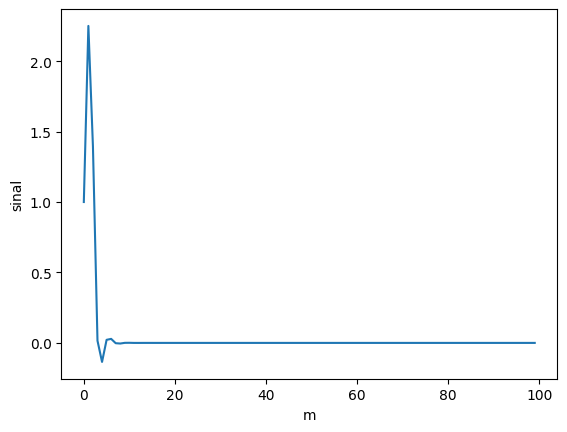

Convolução de h[n] e x[n] obtida analiticamente


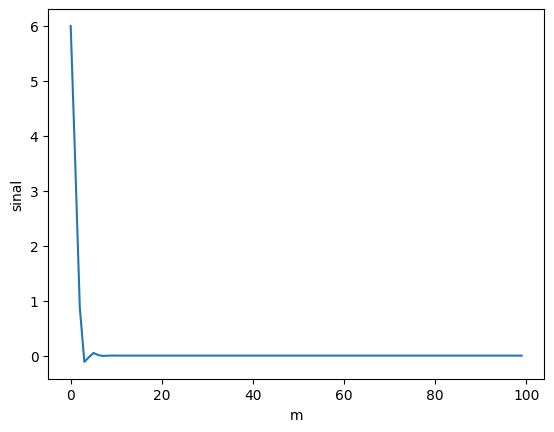

Erro médio quadradico: (0.22385861561119286+0.04617594802301138j)


In [1969]:
def entrada(n):
    if n < 0:
        return 0
    else:
        return (0.25**n)
    
def resposta_analitica(n):
    if n < 0:
        return 0
    else:
        a = 6 * (0.25 ** n)
        α1 = ((-2j * np.sqrt(6)) + 5) / 2
        b = ((0.25 ** (n + 1)) - ((1j / np.sqrt(6)) ** (n + 1))) / (0.25 - (1j / np.sqrt(6)))
        α2 = ((2j * np.sqrt(6)) - 5) / 2
        c = ((0.25 ** (n + 1)) - ((-1j / np.sqrt(6)) ** (n + 1))) / (0.25 - (-1j / np.sqrt(6)))
        return a + (α1 * b) + (α2 * c)

def convolucao(h, x):
    y = []
    for i in range(len(h) + len(x)):
        elemento = 0
        for j in range(len(h) + len(x)):
            if i - j >= 0:
                if (j > (len(h)-1)) and ((i - j) > (len(x)-1)):
                    elemento += 0 * 0
                elif j > (len(h)-1):
                    elemento += 0 * x[i - j]
                elif (i - j) > (len(x)-1):
                    elemento += h[j] * 0
                else:
                    elemento += h[j] * x[i - j]
        y.append(elemento) 
    return y

hm = hn[:20]
xn =[]
resp_an = []

for i in range(100):
    resp_an.append(resposta_analitica(i))

for i in range(20):
    xn.append(entrada(i))

sinal_conv = convolucao(hm, xn)

for i in range(60):
    sinal_conv.append(sinal_conv[-1])

print("Convolução de h[n] e x[n] obtida por função")
plt.plot(sinal_conv)
plt.xlabel("m")
plt.ylabel("sinal")
plt.show()

print("Convolução de h[n] e x[n] obtida analiticamente")
plt.plot(resp_an)
plt.xlabel("m")
plt.ylabel("sinal")
plt.show()

print(f"Erro médio quadradico: {erro(sinal_conv, resp_an)}")


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

Sinal de entrada: data_projeto1.mat


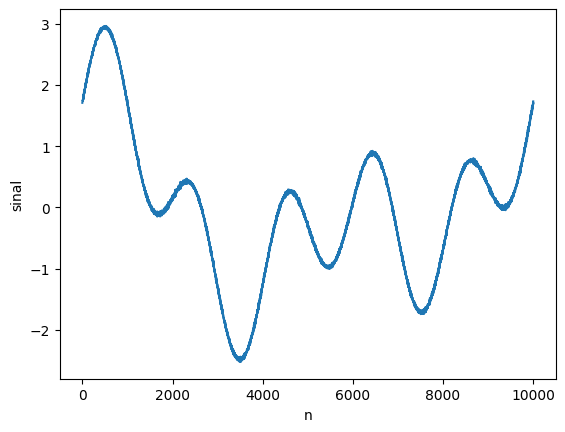

Resposta ao impulso do sistema: h[n]


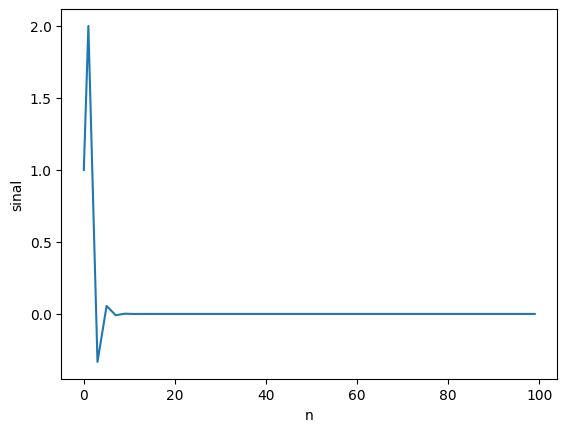

Convolução de data_projeto1.mat e h[n] obtida por função


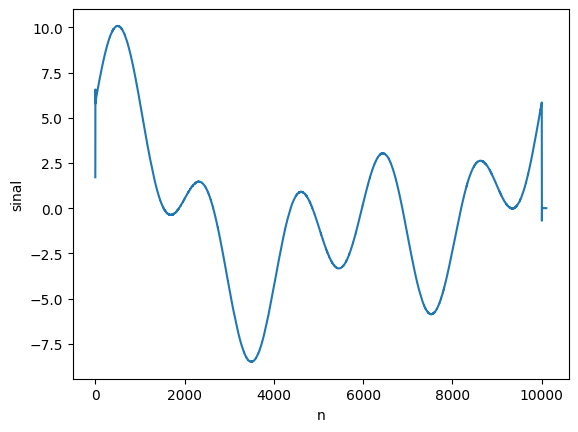

In [1970]:
sinal2e = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

print("Sinal de entrada: data_projeto1.mat")
plt.plot(sinal2e)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print("Resposta ao impulso do sistema: h[n]")
plt.plot(hn)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

resposta = convolucao(hn, sinal2e)

print("Convolução de data_projeto1.mat e h[n] obtida por função")
plt.plot(resposta)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [1971]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

In [1972]:
### Código da questão 3b